In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [96]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 25,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 25,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend(['label 1','label 0'])
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,colors = 'k',linewidths = 1)
    plot_points(X, y)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    plt.show()

# Building an SVM to separate a linear dataset

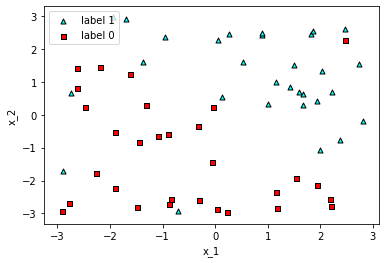

In [97]:
# Loading the linear dataset

df = pd.read_csv('linear.csv')
X = np.array(df[['x_1', 'x_2']])
y = np.array(df['y']).astype(int)
plot_points(X,y)

Accuracy: 0.9333333333333333


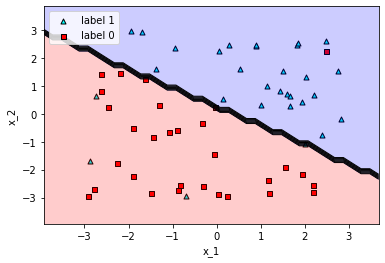

In [98]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(X,y)
print("Accuracy:", svm_linear.score(X, y))
plot_model(X,y,svm_linear)

C = 0.01
Accuracy: 0.8666666666666667


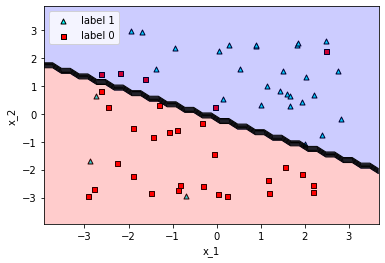

C = 100
Accuracy: 0.9166666666666666


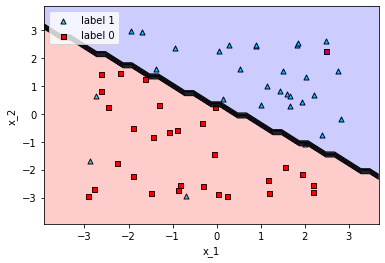

In [99]:
# C = 0.01
svm_c_001 = SVC(kernel='linear', C=0.01)
svm_c_001.fit(X,y)
print("C = 0.01")
print("Accuracy:", svm_c_001.score(X, y))
plot_model(X,y,svm_c_001)

# C = 100
svm_c_100 = SVC(kernel='linear', C=100)
svm_c_100.fit(X,y)
print("C = 100")
print("Accuracy:", svm_c_100.score(X, y))
plot_model(X,y,svm_c_100)

# Building polynomial kernels for a circular dataset

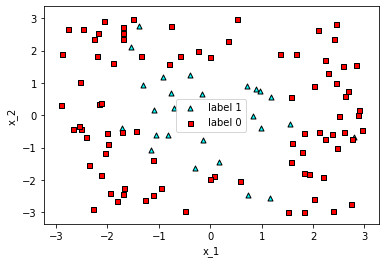

In [100]:
# Loading the one_circle dataset

df = pd.read_csv('one_circle.csv')
X = np.array(df[['x_1', 'x_2']])
y = np.array(df['y']).astype(int)
plot_points(X,y)

Polynomial kernel of degree = 2
Accuracy: 0.8909090909090909


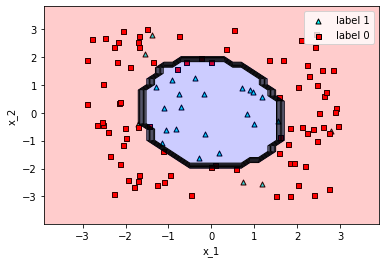

Polynomial kernel of degree = 4
Accuracy: 0.9


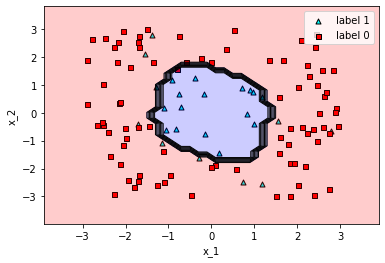

In [101]:
# Degree = 2
svm_degree_2 = SVC(kernel='poly', degree=2)
svm_degree_2.fit(X,y)
print("Polynomial kernel of degree = 2")
print("Accuracy:", svm_degree_2.score(X, y))
plot_model(X,y,svm_degree_2)

# Degree = 4
svm_degree_4 = SVC(kernel='poly', degree=4)
svm_degree_4.fit(X,y)
print("Polynomial kernel of degree = 4")
print("Accuracy:", svm_degree_4.score(X, y))
plot_model(X,y,svm_degree_4)

# Experimenting with gammas in the rbf kernel

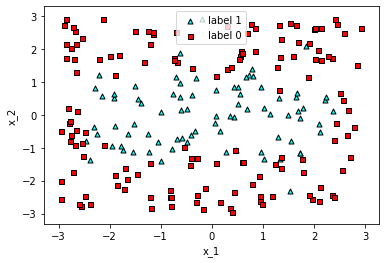

In [114]:
# Loading the two_circles dataset

df = pd.read_csv('two_circles.csv')
X = np.array(df[['x_1', 'x_2']])
y = np.array(df['y'])
plot_points(X,y)

Gamma = 0.1
Accuracy: 0.8772727272727273


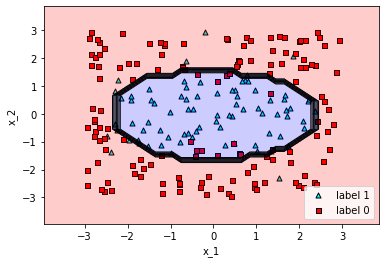

Gamma = 1
Accuracy: 0.9045454545454545


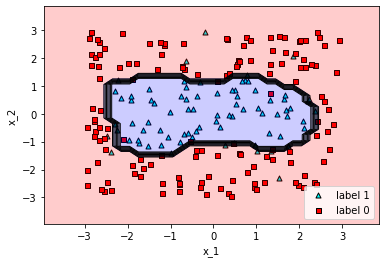

Gamma = 10
Accuracy: 0.9636363636363636


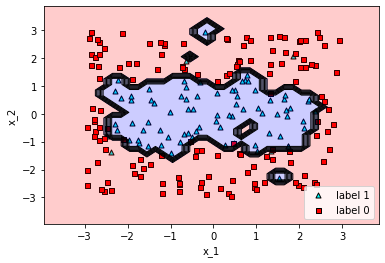

Gamma = 100
Accuracy: 0.990909090909091


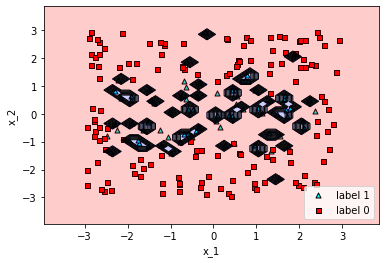

In [115]:
# gamma = 0.1
svm_gamma_01 = SVC(kernel='rbf', gamma=0.1)
svm_gamma_01.fit(X, y)
print("Gamma = 0.1")
print("Accuracy:", svm_gamma_01.score(X, y))
plot_model(X, y, svm_gamma_01)

# gamma = 1
svm_gamma_1 = SVC(kernel='rbf', gamma=1)
svm_gamma_1.fit(X, y)
print("Gamma = 1")
print("Accuracy:", svm_gamma_1.score(X, y))
plot_model(X, y, svm_gamma_1)

# gamma = 10
svm_gamma_10 = SVC(kernel='rbf', gamma=10)
svm_gamma_10.fit(X, y)
print("Gamma = 10")
print("Accuracy:", svm_gamma_10.score(X, y))
plot_model(X, y, svm_gamma_10)

# gamma = 100
svm_gamma_100 = SVC(kernel='rbf', gamma=100)
svm_gamma_100.fit(X, y)
print("Gamma = 100")
print("Accuracy:", svm_gamma_100.score(X, y))
plot_model(X, y, svm_gamma_100)